# Define scorer
make score metrics for the `scoring` parameter that controls what metric they apply to the estimators evaluated, in **`model_selection.GridSearchCV`** and **`model_selection.cross_val_score`**

**1. Methods**
|   |   |
|---|---|
|__metrics.get_scorer__(scoring)| Get a scorer from scorer name in `metrics.get_scorer_names()` |
|__metrics.make_scorer__(score_func, *[, ...]) | Make a scorer from a performance metric or loss function in `metrics` class |

**2. Scorer names**

__Classification__ 

|Index| Scorer name                         | Function                                   |
|---:|:-------------------------------------|:-------------------------------------------|
|  0 | accuracy                           | `metrics.accuracy_score`                 |
|  1 | balanced_accuracy                  | `metrics.balanced_accuracy_score`        |
|  2 | top_k_accuracy                     | `metrics.top_k_accuracy_score`           |
|  3 | average_precision                  | `metrics.average_precision_score`        |
|  4 | neg_brier_score                    | `metrics.brier_score_loss`               |
|  5 | f1                                 | `metrics.f1_score`                       |
|  6 | f1_micro                           | `metrics.f1_score`                       |
|  7 | f1_macro                           | `metrics.f1_score`                       |
|  8 | f1_weighted                        | `metrics.f1_score`                       |
|  9 | f1_samples                         | `metrics.f1_score`                       |
| 10 | neg_log_loss                       | `metrics.log_loss`                       |
| 11 | precision                          | `metrics.precision_score`                |
| 12 | recall                             | `metrics.recall_score`                   |
| 13 | jaccard                            | `metrics.jaccard_score`                  |
| 14 | roc_auc                            | `metrics.roc_auc_score`                  |
| 15 | roc_auc_ovr                        | `metrics.roc_auc_score`                  |
| 16 | roc_auc_ovo                        | `metrics.roc_auc_score`                  |
| 17 | roc_auc_ovr_weighted               | `metrics.roc_auc_score`                  |
| 18 | roc_auc_ovo_weighted               | `metrics.roc_auc_score`                  |

__Clustering__ 

|Index| Scorer name                         | Function                                   |
|---:|:-------------------------------------|:-------------------------------------------|
| 19 | adjusted_mutual_info_score         | `metrics.adjusted_mutual_info_score`     |
| 20 | adjusted_rand_score                | `metrics.adjusted_rand_score`            |
| 21 | completeness_score                 | `metrics.completeness_score`             |
| 22 | fowlkes_mallows_score              | `metrics.fowlkes_mallows_score`          |
| 23 | homogeneity_score                  | `metrics.homogeneity_score`              |
| 24 | mutual_info_score                  | `metrics.mutual_info_score`              |
| 25 | normalized_mutual_info_score       | `metrics.normalized_mutual_info_score`   |
| 26 | rand_score                         | `metrics.rand_score`                     |
| 27 | v_measure_score                    | `metrics.v_measure_score`                |

__Regression__ 

|Index| Scorer name                         | Function                                   |
|---:|:-------------------------------------|:-------------------------------------------|
| 28 | explained_variance                 | `metrics.explained_variance_score`       |
| 29 | max_error                          | `metrics.max_error`                      |
| 30 | neg_mean_absolute_error            | `metrics.mean_absolute_error`            |
| 31 | neg_mean_squared_error             | `metrics.mean_squared_error`             |
| 32 | neg_root_mean_squared_error        | `metrics.mean_squared_error`             |
| 33 | neg_mean_squared_log_error         | `metrics.mean_squared_log_error`         |
| 34 | neg_median_absolute_error          | `metrics.median_absolute_error`          |
| 35 | r2                                 | `metrics.r2_score`                       |
| 36 | neg_mean_poisson_deviance          | `metrics.mean_poisson_deviance`          |
| 37 | neg_mean_gamma_deviance            | `metrics.mean_gamma_deviance`            |
| 38 | neg_mean_absolute_percentage_error | `metrics.mean_absolute_percentage_error` |
| 39 | d2_absolute_error_score            | `metrics.d2_absolute_error_score`        |
| 40 | d2_pinball_score                   | `metrics.d2_pinball_score`               |
| 41 | d2_tweedie_score                   | `metrics.d2_tweedie_score`               |


In [25]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
X, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC(random_state=0)

In [26]:
# get_scorer with score name

from sklearn.metrics import get_scorer
score = get_scorer('accuracy')
cross_val_score(clf, X, y, cv=5, scoring=score)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [31]:
# make_scorer

from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, cv=5, scoring=ftwo_scorer)

In [32]:
# make_scorer with define function score

def fbeta(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta = np.sqrt(5))

fbeta_scorer = make_scorer(fbeta)
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, cv=5, scoring=fbeta_scorer)

# Classification metrics

- Average for __multi-class__:
    - `Micro`: Collective average of TP, FP anf FN.
    - `Weighed`: Takes the average of each metric weighted by the support.
    - `Macro`: Take the average of the individual metrics

In [138]:
# data
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split

# X, y = load_breast_cancer(return_X_y = True)
X, y = make_classification(n_samples=1000, n_features=8, n_informative=3)
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape

((750, 8), (250, 8))

In [183]:
# random forest
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred_p = lr.predict_proba(X_train)[:,1]
y_test_pred_p = lr.predict_proba(X_test)[:,1]
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Baseline prediction: predict the majority class
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Confusion matrix

Lấy ví dụ một bài toán phân loại nhị phân có bảng chéo thống kê kết quả giữa thực tế và dự báo như sau:
![image.png](./_images/5_evaluation_metrics/cfm.png) 
* **TP (True Positive)**: Tổng số trường hợp dự báo khớp Positive.
* **TN (True Negative)**: Tổng số trường hợp dự báo khớp Negative.
* **FP (False Positive)**: Tổng số trường hợp dự báo các quan sát thuộc nhãn Negative thành Positive. Những sai lầm của False Positive tương ứng với sai lầm loại I (__type I error__), chấp nhận một điều sai. Thực tế cho thấy sai lầm loại I thường gây hậu quả nghiêm trọng hơn so với sai lầm loại II được tìm hiểu bên dưới.
* **FN (False Negative)**: Tổng số trường hợp dự báo các quan sát thuộc nhãn Positive thành Negative. Trong trường hợp này chúng ta mắc sai lầm loại II (__type II error__), bác bỏ một điều đúng.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_cm(y_test, y_test_pred, labels = None):
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
    plt.grid(False)

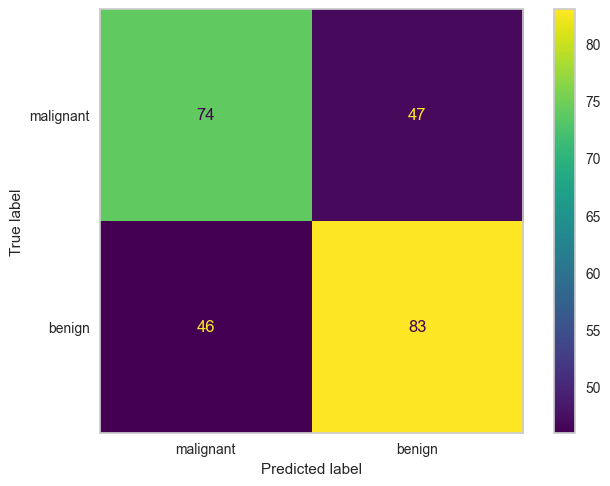

In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

"""
TN | FP

FN | TP
"""
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names).plot()
plt.grid(False)

### multilabel CM

ConfusionMatrix list in which  each element is the CM of each class prediction with all the other label

- `samplewise` for regression, analysis would involve looking at the performance of the model for each sample
- `classwise` for classification, analysis would involve looking at the performance of the model for each class separately

In [186]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = ["cat", "ant", "cat", "ant", "cat", "ant", "ant", "bird", "cat", "cat", "cat", "cat", "ant", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "ant", "ant", "bird", "cat", "ant", "ant", "ant", "bird", "cat", "cat", "ant", "ant"]

cm = multilabel_confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
cm
# ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ant", "bird", "cat"]).plot()

array([[[ 3,  6],
        [ 3,  3]],

       [[11,  2],
        [ 2,  0]],

       [[ 6,  2],
        [ 5,  2]]])

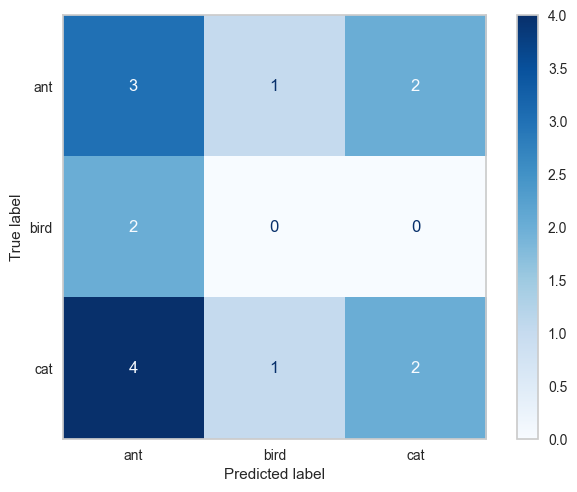

In [187]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ant", "bird", "cat"]).plot(cmap = 'Blues')
plt.grid(False)

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

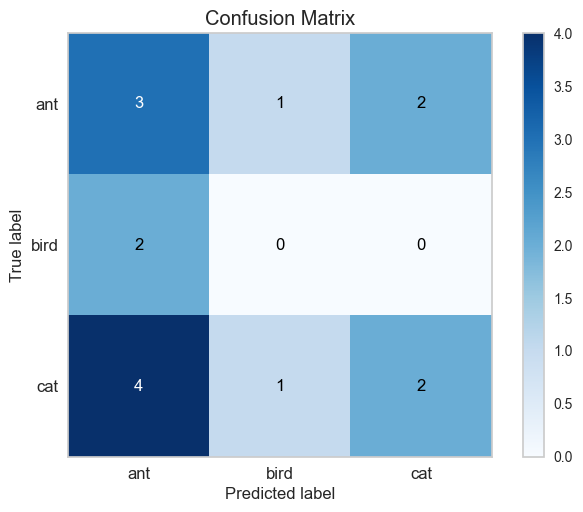

In [244]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)

## Accuracy
Đối với bài toán phân loại thì ta quan tâm tới độ chính xác dự báo trên toàn bộ bộ dữ liệu là bao nhiêu? do đó thước đo phổ biến nhất là __`accuracy` đo tỷ lệ dự báo chính xác all class trên tổng sample__. 

$$\text{Accuracy} = \frac{TP+TN}{\text{total sample}} $$

Trong tính huống mô hình bị mất cân bằng thì `accuracy` không còn là thước đo tốt nên được thay thế bằng `precision, recall`. 

In [188]:
from sklearn.metrics import accuracy_score

print('accuarcy without model',accuracy_score(y_test, y_test_base))
print('accuarcy logistic model',accuracy_score(y_test, y_test_pred))

accuarcy without model 0.484
accuarcy logistic model 0.628


### Top k accuracy score
Xác định giá trị/tỷ lệ dự đoán đúng của k top labels được predict (rank bằng predicted score)

In [191]:
from sklearn.metrics import top_k_accuracy_score

top_k_accuracy_score(y_test, y_test_pred, k = 1)

0.628

## Precision, Recall, Fscore

### Recall

$$\operatorname{Sensitive}=\operatorname{Recal}=\text{HitRate}=\frac{TP}{TP+FN}=\frac{\text{Dự đoán đúng Positive}}{\text{Thực tế Positive}}$$

- Quan tâm tới tỷ lệ dự báo chính xác positive trên tổng positive thực tế hay khả năng bắt P của model __ngoài thực tế__
- `Recall` quan trọng khi muốn hạn chế FN (mô hình dự đoán là 0 (sai), thực tế là  1)

In [192]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred)

0.6434108527131783

#### Balance accuracy (mean recall)
The balanced accuracy in binary and multiclass classification problems to __deal with imbalanced datasets__. It is defined as the average of recall obtained on each class.

In [268]:
from sklearn.metrics import balanced_accuracy_score

print('Balance accuarcy without model',balanced_accuracy_score(y_test, y_test_base))
print('Balance accuarcy logistic model',balanced_accuracy_score(y_test, y_test_pred))

Balance accuarcy without model 0.5
Balance accuarcy logistic model 0.6274905503235313


In [190]:
# adjust = True, random performance would score 0, while keeping perfect performance at a score of 1
print('Balance accuarcy without model',balanced_accuracy_score(y_test, y_test_base, adjusted=True))
print('Balance accuarcy logistic model',balanced_accuracy_score(y_test, y_test_pred, adjusted=True))

Balance accuarcy without model 0.0
Balance accuarcy logistic model 0.2549811006470626


#### Geometric mean recall
Giá trị Sensitive trung bình nhân của các class: 
$$Gmean = \sqrt[n]{\prod_{i = 1}^{n}Recall_i}$$

- Nếu classifier ko có khả năng dự đoán 1 class nào đó ngoài thực tế thì Gmean = 0
- Nếu classifier có khả năng dự đoán tất cả các class ngoài thực tế thì Gmean = 1

In [267]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_test_pred)

0.6272885577763637

### Precision

$$\text{Precision} = \frac{TP}{\text{total predicted positive}} = \frac{TP}{TP+FP}$$

- Quan tâm tới tỷ lệ dự báo chính xác positive trên tổng số trường hợp được __model dự báo là positive__
- `Precision` quan trọng khi muốn hạn chế FP (mô hình dự đoán là 1 (sai), thực tế là  0)

In [193]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred)

0.6384615384615384

#### Average precision score
- __Average precision__ summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:
$$\mathbf{AP}=\sum_{n}(R_{n}-R_{n-1})P_{n}$$

In [194]:
from sklearn.metrics import average_precision_score

# vs probability y test score
average_precision_score(y_test, y_test_pred_p) 

0.7137483481553051

### Support

- **Support** = Number of cases on each class

### F beta score

- **F1-score** là trung bình điều hoà đại diện cho cả precision và recall, __F1 score càng cao thì model càng tốt__. Sử dụng `F1 score` khi:
$$f_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$
    - Cần sự cân bằng giữa precision và recall
    - Data bị imbalance giữa 0 và 1
    - Nếu precision tăng nhẹ làm recall giảm mạnh hoặc ngược lại thì dẫn tới F1-score sẽ rất thấp
----------------
- **Fbeta-score** $f_{\beta}$ là trường hợp tổng quát hơn của $f_1$ khi ta coi mức độ quan trọng của `recall` bằng $\beta^2$ lần `precision`.

$$\begin{eqnarray}
f_{\beta} & = & \frac{1+\beta^2}{\frac{1}{\text{precision}} + \frac{\beta^2}{\text{recall}}} & = & \frac{(1+\beta^2) \times \text{precision} \times \text{recall}}{\beta^2 \text{precision}+\text{recall}} & = & \frac{(1+\beta^2)\times\text{TP}}{(1+\beta^2)\times\text{TP}+\beta^2 \times \text{FN} + \text{FP}}
\end{eqnarray}$$

- lựa chọn `f-score` metric để đánh giá model với imbalance data và kết hợp được đánh giá `precision` and `recall`
- Với bài toán phân loại khách hành `good`/`bad`, tránh phân loại khách hàng `BAD` thành `Good` hơn là `Good` thành `Bad`, do đó ưu tiên `Recall`, giả sử `Recall` ưu tiên gấp 5 lần `Precision`, tức `B^2 = 5`
    - Nếu 𝛽 >1 (default = 2), ưu tiên recall
    - Nếu 𝛽 <1 (default = 0.5), ưu tiên precision


In [195]:
# f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred)

0.6409266409266409

In [196]:
# f beta score
from sklearn.metrics import fbeta_score

fbeta_score(y_test, y_test_pred, beta = np.sqrt(5) )

0.6425806451612903

### Probability & Precision_recall_curve

![image.png](_images/5_Evaluation_metrics/pre_rec_curve.png)

- Đường cong __precision__, __recall__ giúp lựa chọn ngưỡng xác suất phù hợp để mang lại độ chính xác cao hơn cho __precision__ hoặc __recall__. 
    - __precision__ cho ta biết tỷ lệ dự báo chính xác trong số các hồ sơ được dự báo là `BAD` (tức nhãn là 1 Positive). 
    - __recall__ đo lường tỷ lệ dự báo chính xác các hồ sơ thực tế là `BAD` . 
- Luôn có sự đánh đổi giữa 2 tỷ lệ này, muốn model predict `BAD` tỷ lệ chính xác càng cao thì khả năng `BAD` không được predict càng nhiều và ngược lại.
- Thông thường sẽ dựa trên kì vọng về __precision__ hoặc __recall__ (mục tiêu model) từ trước để lựa chọn ngưỡng `threshold`. 
    - Với kì vọng tỷ lệ dự báo đúng hồ sơ `BAD` là `70%`, chọn `threshold` để __recall__ >= 70%. 
    - Hoặc kì vọng tỷ lệ dự báo đúng trong số các hồ sơ được dự báo là `BAD` là 70%, chọn `threshold` để __precision__ >= 70%.
    
**Có sự đánh đổi giữa Recal và Precision:**
1. Precision cao - recall thấp
    - Mô hình dự đoán có độ chính xác  cao tuy nhiên khả năng bắt ngoài thực tế thấp, ưu tiên độ chính xác (hệ thống gợi ý sản phẩm tốt, tránh sản phẩm kém)
    - Không nên tin về dự đoán N, chỉ nên tin vào dự đoán P
2. Precision thấp - recall cao
    - Mô hình bắt được nhiều ngoài thực tế nhưng cũng bắt sai nhiều, ưu tiên bắt được càng nhiều P càng tốt, ví dụ như dự đoán ung thư (P), ko nên tin vào dự đoán P
    

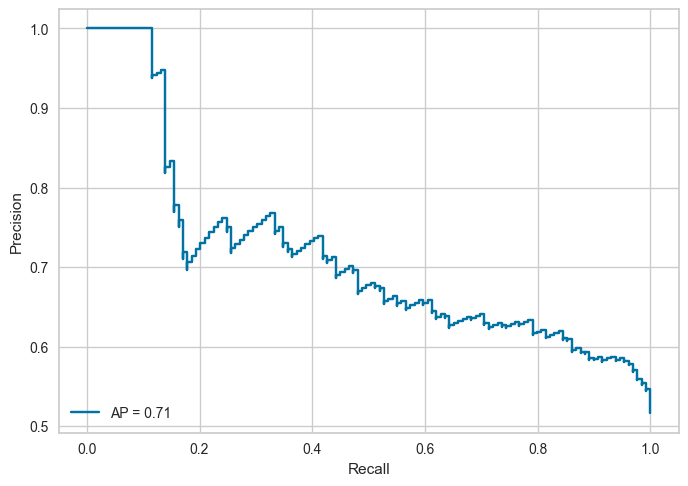

In [198]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_p)
avg_precision = average_precision_score(y_test, y_test_pred_p) 

# plot Precision by Recall
PrecisionRecallDisplay(precision, recall, average_precision= avg_precision).plot()

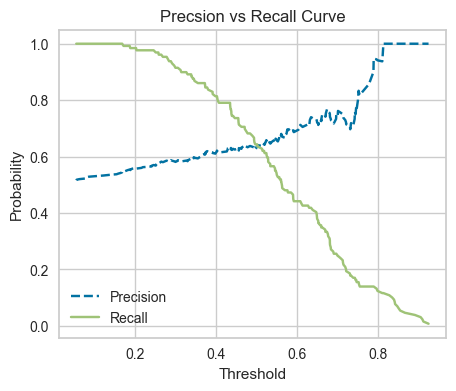

In [212]:
def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (5, 4))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thresholds)

/Users/khongdat/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


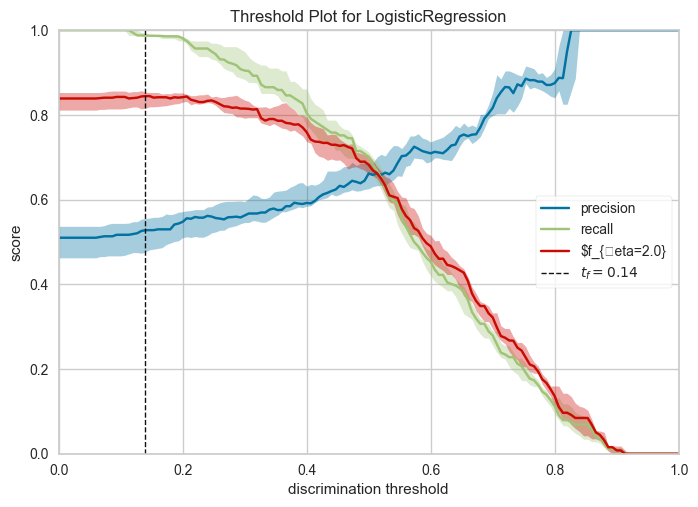

<AxesSubplot: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [223]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(lr,
                                     n_trials=10,
                                     cv=0.2,
                                     fbeta=2.0,
                                     argmax='fscore', # vi tri probability cut-point cho metrix dat max
                                     is_fitted='auto',
                                     exclude = "queue_rate",
                                    quantiles=np.array([0.3, 0.5, 0.7]), # range median of curve in multi n trials
                                    )
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

**Thay đổi cutpoint probability (threshold)**
![image.png](_images/5_Evaluation_metrics/cutoff_proba.png)

Ứng với mỗi giá trị __Recall__ cao hơn là tỷ lệ __False positive rate__ cao hơn. Khi các điểm __cutpoint__ tăng dần thì tỷ lệ __Recall__ giảm dần do ở mức điểm cao hơn thì số lượng được dự báo là __positive__ có thể giảm trong khi số lượng __positive thực tế__ không đổi -> __Recall__ có thể giảm. Đồng thời tỷ lệ __False positive rate__ tăng do mức điểm cao hơn thì số lượng dự báo là __positive__ tăng -> số lượng được dự báo sai __FP (Failse Positive)__ có thể tăng -> Tỷ lệ __False positive rate__ tăng


### Specificity
$$\operatorname{Specificity}=\frac{TN}{TN+FP}=\frac{\text{Dự đoán đúng Negative}}{\text{Thực tế Negative}}$$

- Quan tâm tới khả năng bắt đúng N ngoài thực tế, ưu tiên bắt được càng nhiều N ngoài thực tế càng tốt

In [226]:
recall_score(y_test, y_test_pred, pos_label=0)

0.6115702479338843

### NPV
$$\operatorname{NPV}=\frac{TN}{TN+FN}=\frac{\text{Dự đoán đúng Negative}}{\text{Dự đoán Negative}}$$

- Quan tâm tới khả năng bắt đúng N dự đoán của mô hình.

In [227]:
precision_score(y_test, y_test_pred, pos_label=0)

0.6166666666666667

### Classification Report

In [269]:
# full report
from sklearn.metrics import precision_recall_fscore_support

# show cả label negative (trước) và positive (sau)
precision, recall, fscore, support =precision_recall_fscore_support(y_test, y_test_pred)

recall

array([0.61157025, 0.64341085])

In [271]:
recall.prod()**(1.0/len(recall))

0.6272885577763637

In [270]:
recall.mean()

0.6274905503235313

In [225]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       121
           1       0.64      0.64      0.64       129

    accuracy                           0.63       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.63      0.63      0.63       250



#### report for imbalance data

In [273]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.61      0.64      0.61      0.63      0.39       121
          1       0.64      0.64      0.61      0.64      0.63      0.39       129

avg / total       0.63      0.63      0.63      0.63      0.63      0.39       250



## AUC, ROC, GINI
- [Chi tiết đường cong ROC](https://rstudio-pubs-static.s3.amazonaws.com/267441_5459af9d83ae44f18a13aea4a479f31f.html)
- [Relationship between ROC and Precision_Recall_Curve](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)
- Chỉ số AUC (area under curve) đo lường phần diện tích nằm dưới đường cong ROC cho biết khả năng phân loại của các hợp đồng GOOD/BAD của mô hình hồi qui logistic là mạnh hay yếu. AUC , giá trị của nó càng lớn thì mô hình càng tốt.
- `GINI` = 2`AUC` - 1

### ROC
Thể hiện với từng điểm `cut-point` (điểm phân tách 0/1), thể hiện mối quan hệ giữa `False Positive Rate` (FRP = 1 - specificity) với `Recall`
- X-axis: FPR = 1 - specificity
- Y-axis: Recall

![image.png](_images/5_Evaluation_metrics/roc_space.png)

Một model có sức mạnh dự báo lớn hơn so với việc dự báo random khi nó có ROC nằm phía trên bên trái đường random line. Giá trị cutpoint tốt nhất để phân loại Positive và Negative cho model là điểm tiệm cận của đường thẳng song song với đường random line với ROC curve.

__Note__: ROC đặc trưng bằng việc thay đổi cutpoint phân lớp, khác với Lift curve đặc trưng bằng việc thay đổi tỷ lệ subsample của total data có mức độ highest probability positive

### AUC
- Là phần diện tích phía dưới đường ROC, thể hiện độ hiệu quả của mô hình:
    - AUC = 1 thể hiện perfect model (Recall = 1, Specificity = 1): model dự đoán đúng tất cả Positive và không dự đoán sai Negative nào thành Positive.
- AUC không phụ thuộc vào điểm cutpoint probability

In [233]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay

In [229]:
# tính FPR và recall cho từng cutpoint threshold
fpr, tpr, thres = roc_curve(y_test, y_test_pred_p)

In [230]:
# tính AUC from FPR và recall
auc(fpr, tpr)

0.7011980267794222

In [232]:
# tính AUC from y true và y prediction probability
roc_auc_score(y_test, y_test_pred_p)

0.7011980267794222

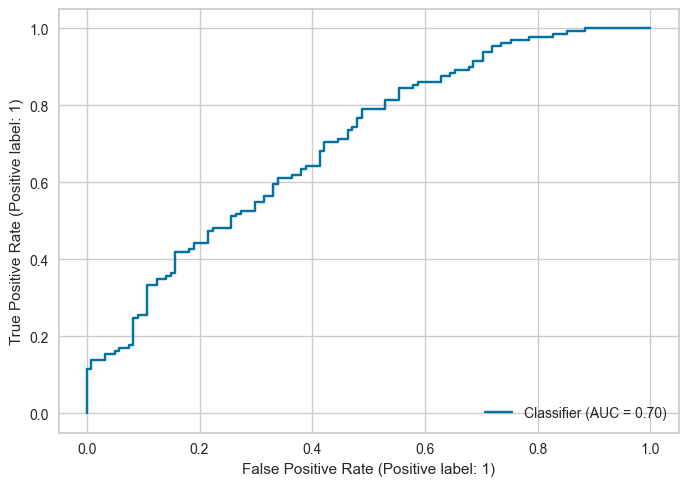

In [236]:
RocCurveDisplay.from_predictions(y_test, y_test_pred_p)

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

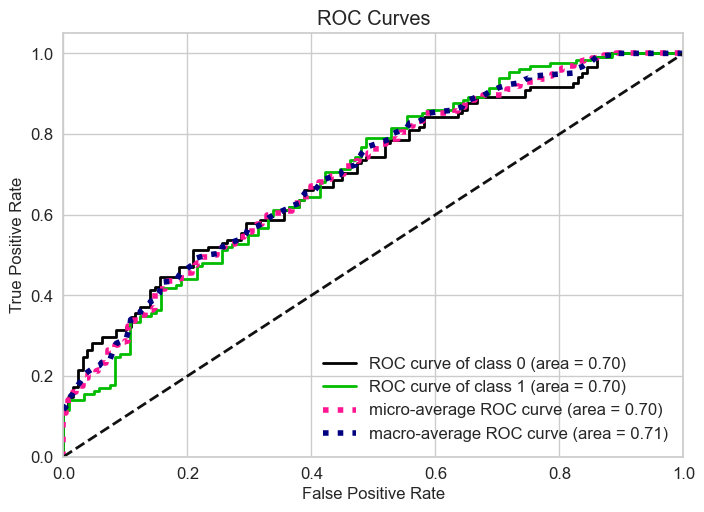

In [262]:
# multi-class
skplt.metrics.plot_roc(y_test, lr.predict_proba(X_test))

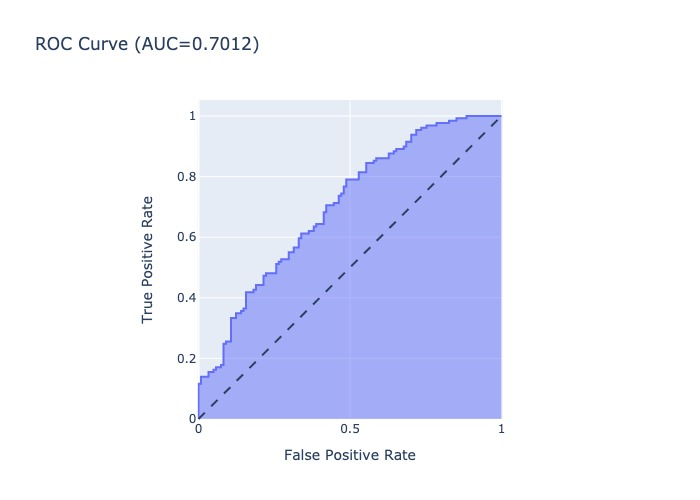

In [238]:
import plotly.express as px
def AUC_plot(y_test, y_test_pred_p):
    fpr, tpr, thres = roc_curve(y_test, y_test_pred_p)
    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape( type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1 )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    
    return fig.show(renderer = 'jpeg')

AUC_plot(y_test, y_test_pred_p)

### GINI
$$GINI = 2AUC -1$$
- Tỷ lệ Gini trên 60% tương ứng với một mô hình tốt

## KS

Là kiểm định thống kê non-parametric dùng để so sánh 2 phân phối, đánh giá mức độ tương đồng giữa chúng. Cụ thể với bài toán phân tách 0 và 1, đây là kiểm định đo lường sự khác biệt trong phân phối giữa `0` và `1` actual theo các tỷ lệ ngưỡng probability outcome. Nếu mô hình có khả năng phân loại `0` và `1` tốt thì đường cong phân phối xác suất tích lũy (`cumulative distribution function - cdf`) giữa `0` và `1` phải có sự tách biệt lớn. Trái lại, nếu mô hình rất yếu và kết quả dự báo của nó chỉ ngang bằng một phép lựa chọn ngẫu nhiên. Khi đó đường phân phối xác suất tích lũy của `0` và `1` sẽ nằm sát nhau. 
- Kiểm định `Kolmogorov-Smirnov` sẽ kiểm tra giả thuyết `Ho` là hai phân phối xác suất 0 và 1 không có sự khác biệt. Khi `P-value` < 0.05 bác bỏ giả thuyết `Ho`.
    - X-axis: ngưỡng probability outcome, hoặc binning theo hạng
    - Y-axis: cdf của phân phối 1 và 0

__--> Khoảng cách xa nhất của 2 đường phân phối càng lớn thể hiện phân phối của 0 và 1 dựa theo score càng khác nhau, tức score có tính phân loại 0/1__

KS-score = 0.2948299058235633| p-value = 0.365 (Below 0.05, significant)


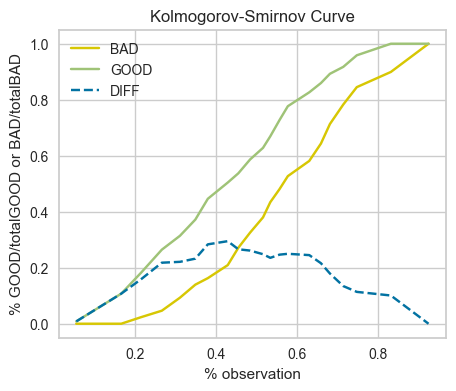

In [224]:
# Kiểm định Kolmogorov-Smirnov test:
from scipy import stats

def _KS(y_test,y_pred_p,  n_bins):
    """
    Tính toán phân phối xác suất tích lũy của GOOD và BAD
    """
    bucket, thresholds = pd.qcut(y_pred_p, q=n_bins, retbins=True)
    cmd_BAD = []
    cmd_GOOD = []
    BAD_id = set(np.where(y_test == 1)[0])
    GOOD_id = set(np.where(y_test == 0)[0])
    total_BAD = len(BAD_id)
    total_GOOD = len(GOOD_id)
    for thres in thresholds:
        pred_id = set(np.where(y_pred_p <= thres)[0])
        # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
        per_BAD = len(pred_id.intersection(BAD_id))/total_BAD # thực tế là bad và dự báo là bad
        cmd_BAD.append(per_BAD)
        # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
        per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD # thực tế là good và dự báo là 
        cmd_GOOD.append(per_GOOD)
    cmd_BAD = np.array(cmd_BAD)
    cmd_GOOD = np.array(cmd_GOOD)
    # print(bucket)
    return cmd_BAD, cmd_GOOD, thresholds

# Biểu đồ phân phối xác suất tích lũy của GOOD và BAD
def _plot_KS(cmd_BAD, cmd_GOOD, thresholds):
    """
    Biểu đồ phân phối xác suất tích lũy của GOOD và BAD
    """
    pvalue = stats.ks_2samp(cmd_BAD, cmd_GOOD).pvalue
    print('KS-score = {}'.format(max(abs(cmd_BAD-cmd_GOOD))), end = "| ")
    print('p-value = {:.3f} (Below 0.05, significant)'.format(pvalue))
    plt.figure(figsize = (5, 4))
    plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
    plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
    plt.plot(thresholds, abs(cmd_BAD-cmd_GOOD), 'b--', label = 'DIFF')
    plt.xlabel('% observation')
    plt.ylabel('% GOOD/totalGOOD or BAD/totalBAD')
    plt.title('Kolmogorov-Smirnov Curve')
    plt.legend()
    
cmd_BAD, cmd_GOOD, thresholds = _KS( y_test,y_test_pred_p, n_bins=20)
_plot_KS(cmd_BAD, cmd_GOOD, thresholds)


<AxesSubplot: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

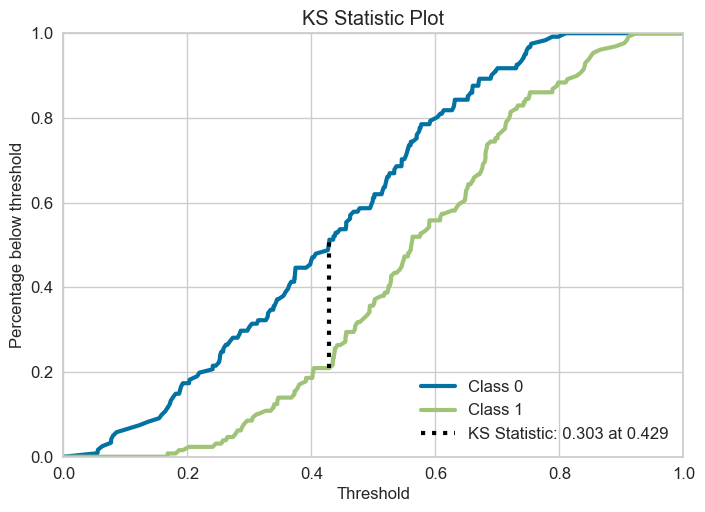

In [263]:
skplt.metrics.plot_ks_statistic(y_test, lr.predict_proba(X_test))

## Cohen's kappa score
- $\kappa$ thường được sử dụng để đo mức độ tương đồng ý kiến của 2 người cho N obs vào C nhóm labels không giao nhau đôi một. 
- Trong __Classification__, $\kappa$ sử đụng để đánh giá accuracy của model prediction và thực tế của __N__ obs cho __C__ class cho __Imbalance class__ (chỉ số `Accuracy` thông thường không hiệu quả trong dữ liệu bị __imbalance__)
$$\kappa = \frac{p_o-p_e}{1-p_e}$$
    
    Trong đó:
    - $p_o = \frac{\text{Số quan sát model predict đúng label}}{\text{Tổng sample}}$ là độ `accuracy` tiêu chuẩn của mô hình classìication
    - $p_e$ là xác suất cùng xảy ra 1 outcome (label) đồng thời của 2 event nếu coi việc phân loại theo model là 1 event. độc lập với event phân loại theo xác suất phân phối actual. $p_e = \frac{\sum_{i=1}^{C}(n_{i1} \times n_{i2})}{N^{2}}$, trong đó $n_{i1}$ là số lượng quan sát của người thứ nhất vote cho label thứ i, trong tổng số __N__ quan sát và __C__ labels
    
- Trong bài toán __Binary Classification__:
$$\kappa={\frac{2\times(T P\times T N-F N\times F P)}{(T P+F P)\times(F P+T N)+(T P+F N)\times(F N+T N)}}$$
----
__Range của $\kappa$ từ -1 đến 1:__

- Nếu $\kappa < 0$: model có khả năng phân loại ngược lại với thực tế.
- Nếu $\kappa = 0$, tức model có $\frac{TP}{FP} = \frac{FN}{TN} = \frac{TP + FN}{FP + TN} = \frac{ActualPositive}{ActualNegative}$ => Model chỉ có khả năng phân loại bằng với __random guess__
- Nếu $\kappa$ gần 1, model càng có khả năng phân loại tốt và khác với __random guess__
- Nếu $\kappa = 1$, tức chỉ số $p_o$ = `accuracy` = 1, tức model có độ chính xác tuyệt đối, phân loại hoàn toàn chính xác các obs vào các label
----
__$\kappa$ dealing with imbalance data__
- $\kappa$ thể hiện hiệu quả về độ chính xác của mô hình hơn chỉ số `accuracy` khi làm việc với __imbalanced data__ trong bài toán __classification__, bằng việc lấy `accuracy` loại bỏ thêm xác suất trùng label khi lấy random trong 2 event độc lập $p_e$
- Khi mức độ __imbalance data__ càng lớn, thì $p_e$ càng lớn (nếu cùng một độ `accuray` $p_o$), khi đó làm $\kappa$ càng nhỏ, thể hiện chính xác hơn về hiệu suất model (do `accuracy` không thay đổi)

In [286]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

0.2550464594681192

## Class likelihood ratios
 Thể hiện mức độ dự đoán của model trên tập test positive và test negative.

- __The positive likelihood ratio__  ranges from 1 to infinity, giá trị càng cao tức là khả năng dự đoán P càng tốt trên tập `true positive` so với `true negative`
$$L R_{+}=\frac{\mathrm{PR}(P+|T+)}{\mathrm{PR}(P+|T-)}$$
- __The negative likelihood ratio__  ranges from 0 to 1, giá trị càng thấp càng tốt.
$$L R_{-}=\frac{\mathrm{PR}(P-|T+)}{\mathrm{PR}(P-|T-)}$$

The notation here refers to predicted $P$ or true $T$ label and the sign $+$ and $-$ refer to the positive and negative class, respectively, e.g. $P+$ stands for “predicted positive”. $PR$ is probability

In [120]:
from sklearn.metrics import class_likelihood_ratios

class_likelihood_ratios(y_test, y_test_pred)

(8.625, 0.046875)

## Calibration curve

**1. Probability Calibration**
- Ứng với các mô hình ngoài việc dự đoán label thì còn predict xác suất của từng class (`predict_proba`), thì model có well-calibrated khi predicted probability mathches với xác suất thực tế của event đó (Probabilities match the true likelihood of events)
    - Ví dụ: trong model binary classifier, nếu prob threshold để xác định class 1 là 0.4 và tương ứng với threshold 0.4 đó có 60% quan sát dự đoán là 1 và 40% quan sát dự đoán là 0, thì xác suất dự đoán của model là well-calibrated.
    
- __Uncalibrated Probabilities__ thường xuất hiện trong các model ko train bằng probabilitistic framework hoặc dữ liệu bị imbalance, skewed distribution, hoặc biases in training data. Trong imbalance/ skewed distribution/ bias dataset, model thường dự đoán trung bình với xác suất cao hơn cho majority class. 

- __ML algorithms có calibrated probabilities__, bởi vì dự đoán dự trên probabilities framework (ví dụ maximun likelihood estimation):
    - Logistic Regression
    - Linear discriminant analysis
    
(and some others not well) Artificial Neural Networks, SVM, Decision Tree, Ensembles of Decision Trees (bagging, random forest, gradient boosting), Knn, Naive Bayes.

**Why should care about uncalibrated probability ?**
- If just classify the label (not nescessarily to care about uncalibrated)
- If looking up for probability of prediction (need to care), importance with the confident of this prediction of label --> should calibrated probability (if any) in ML algorithms (except: logistic, LDA)

**2. Calibration curve**

- Chart thể hiện tỷ lệ số lượng Positive có match với xác suất X = Positve của model dự đoán hay ko ?:
    - `x-axis` (mean_predicted_value): Xác suất trung bình của các positive obs trong từng bin xác suất (xác suất P(1|X) `predict_proba`)
    - `y-axis` (fraction_of_positives): tỷ trọng % số lượng Positive obs in this bin sample in x-axis
- Nếu model dự báo xác suất tốt, the curve sẽ gần với diagonal line là perfect calibration, the predicted probabilities đáng tin cậy so với phân phối tỷ lệ positive class

- [Compare_calibration of Classifiers](https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html)

-**Number of observation in each bin probability**

Nếu trong một bin có ít obs, thì giá trị fraction_of_positives/mean_predicted_value tại bin đó có thể bị bias, dẫn tới việc đánh giá sai mức độ calibrated probability của mô hình. Cụ thể, nếu số lượng obs quá thấp, không thể đánh giá được là probability có well-calibrated hay không, ngay cả trên curve thể hiện là under/over calibrated. Do đó cần phải lựa chọn số lượng bin phù hợp:
- Nếu có quá nhiều bin , dẫn tới số lượng obs tại một số bin bị ít, đường Calibration curve noise
- Nếu có quá ít bin , đường Calibration curve bị quá fit với diagonal line

![image.png](_images/5_Evaluation_metrics/cali1.png)

__Trong dữ liệu Imbalance__, do dữ liệu bị mất cân bằng (Class 1 ít quan sát) nên thường các bin tại vùng xác suất cao có sô lượng obs thấp. It is very hard to say if the probability is calibrated, because there are few obs of positive class.

![image.png](_images/5_Evaluation_metrics/cali2.png)

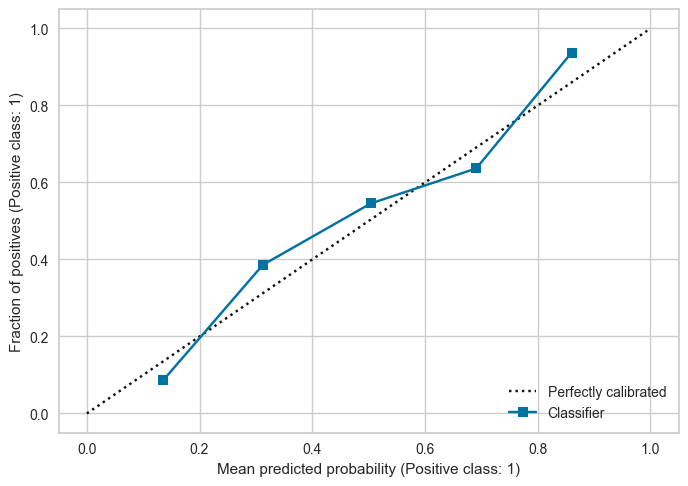

In [291]:
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_predictions(y_test, y_test_pred_p)

### On imbalance dataset
Các kỹ thuật sử lý dữ liệu imbalance như Under/Over sampling hoặc Cost Sensitive learning sẽ distort the relationship giữa `predicted probability` và `the fraction of positive obs` ==> **Need to re-calibrate the probability**

- **Calibrating a Classifier** : mapping model predictions to __posterior probabilities__
![image.png](_images/5_Evaluation_metrics/cali3.png)
_By the way, note that probability calibration works on any ranked scores, not just on probabilities. So for example, in the support vector classifier case, seeing how expensive probabilities are to generate, we may choose instead to use "distance from the nearest support vector" as our score._

    - Should perform the calibration on the _testset_ or use `cross-validation` if little dataset. Not calibrate on trainset, lead to overfitting
**Technical re-calibrated methos :**

1. __Platt Scaling__ (parametric approach)
New probability after scaling by logistic transformation:
$$P(y=1 \: | \: x_i) = \frac{1}{1 + \exp{(Af(x_i) + B)}}$$
In which:
- $f(x_i)$ be the probability assigned to the record $x_i$ by the classifier
- $A$ and $B$ are scaling parameters, to be determined at fitting time (using some kind of maximum likelihood estimation algorithm), which control how the scaling is applied, solves for the smallest difference between the mean probability and the true probability within each bin.

**Platt scaling** áp dụng logistic transformation cho prediction probability trong đó có error theo dạng sigmoid shape (ví dụ như `SVM` hay `random forest`,...) lam smooth các xác suất thành 1 linear distribution, tạo thành xác suất gần hơn với perfect calibration.

2. __Isotonic Regression__(non-parametric approach)

__Isotonic regression__ is a regression algorithm which fits a piecewise constant, non-decreasing function to a distribution of data. Thuật toán Isotonic dự đoán constant theo từng phần/step, nhóm data thành từng phần constant với mục tiêu là tối thiểu sai lệch giữa Y dự đoán và thực tế. Here is an example of a fitted isotonic regression result:
![](https://i.imgur.com/94fDuwQ.png)

The goal of __Isotonic Regression__ in re-calibration procedure (minimize cumulative neighborhood probability error) is the same with __Platt Scaling__

(8371, 74) (3588, 74)


<AxesSubplot: ylabel='target'>

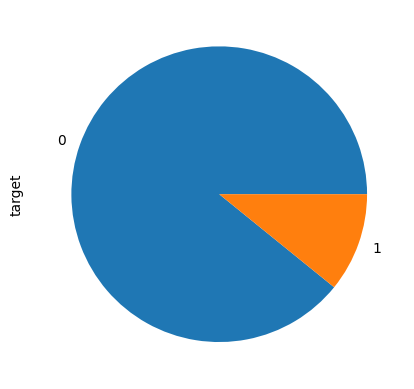

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load data
# only a few observations to speed the computaton
data = pd.read_csv('Datasets/kdd2004.csv').reset_index(drop=True)
data.drop(data[(data.target==0) & (data.index<135000)].index, inplace = True)

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0, stratify=data['target'])

print(X_train.shape, X_test.shape)
y_train.value_counts().plot(kind= 'pie')

In [41]:
def compare_calibrated_curve(estimator, X_train, X_test, y_train, y_test):
    
    fig, ax = plt.subplots(1, figsize=(12, 6))
    ax.plot([0, 1], [0, 1], '--', color='gray')

    # Uncalibrated
    estimator.fit(X_train, y_train)
    y_test_predict_proba = estimator.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)
    ax.plot(mean_predicted_value, fraction_of_positives, 's-', label='Uncalibrated')

    # Isotonic calibration
    estimator_isotonic = CalibratedClassifierCV(estimator, cv=5, method='isotonic')
    estimator_isotonic.fit(X_train, y_train)
    prob_isotonic = estimator_isotonic.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_isotonic, n_bins=10)
    ax.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Calibrated (Isotonic)')

    # Sigmoid calibration / Platt Scaling
    estimator_sigmoid = CalibratedClassifierCV(estimator, cv=5, method='sigmoid')
    estimator_sigmoid.fit(X_train, y_train)
    prob_sigmoid = estimator_sigmoid.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_sigmoid, n_bins=10)
    ax.plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibrated (Platt)')

    plt.gca().legend()

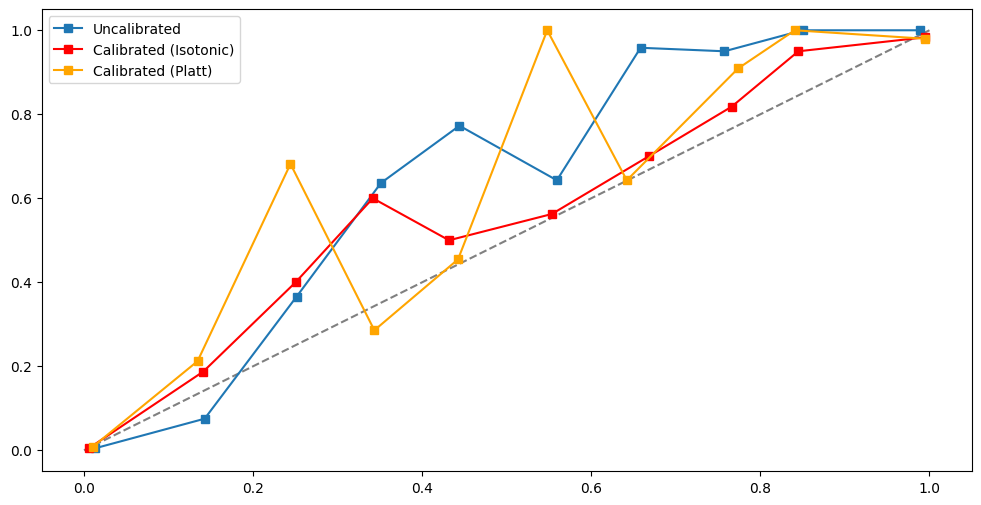

In [42]:
# raw imbalance dataa

from sklearn.calibration import CalibratedClassifierCV,calibration_curve
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
compare_calibrated_curve(clf, X_train, X_test, y_train, y_test)

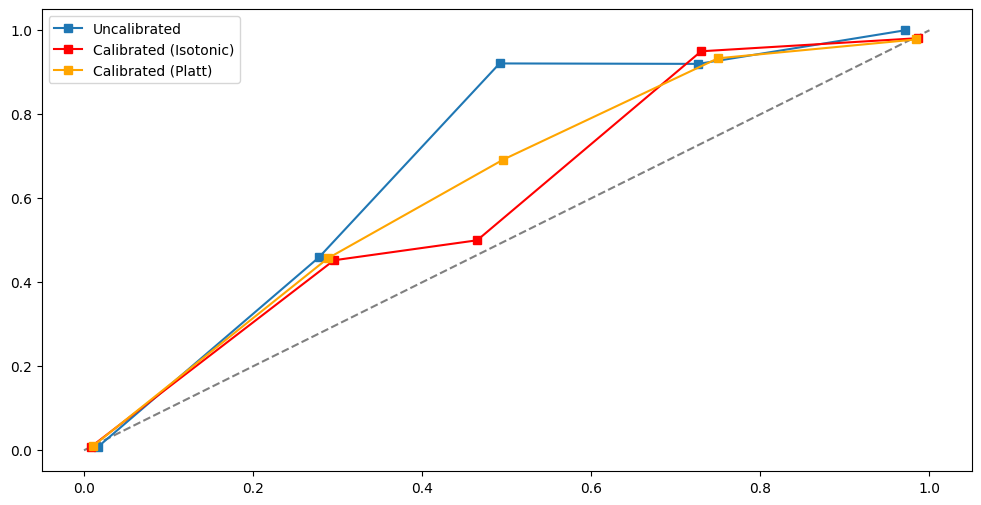

In [40]:
# apply cost sensitive to handle imbalance data

clf = RandomForestClassifier(class_weight={0:1, 1:8})
compare_calibrated_curve(clf, X_train, X_test, y_train, y_test)

0    907
1    907
Name: target, dtype: int64


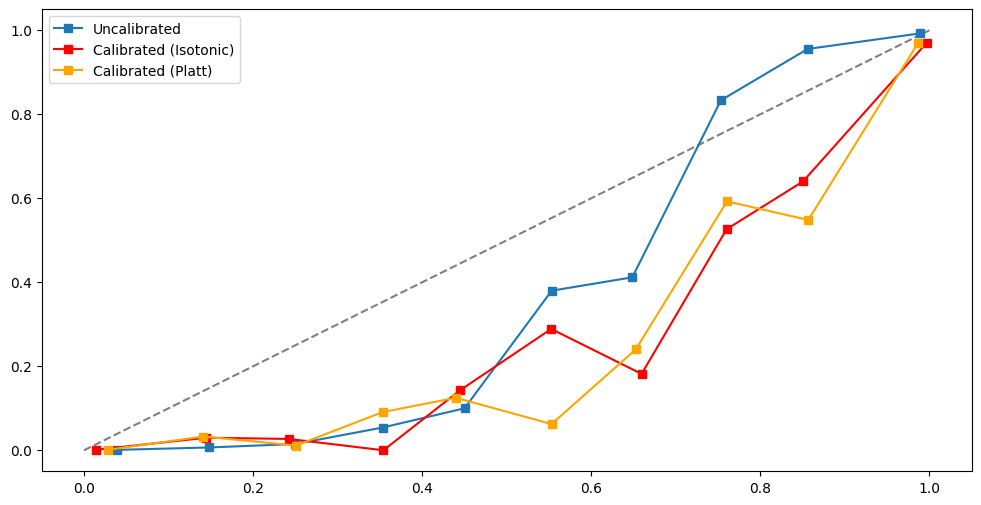

In [45]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only from majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(y_rus.value_counts())

clf = RandomForestClassifier()
compare_calibrated_curve(clf, X_rus, X_test, y_rus, y_test)

/Users/khongdat/miniforge3/lib/python3.10/site-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0    7464
1    7464
Name: target, dtype: int64


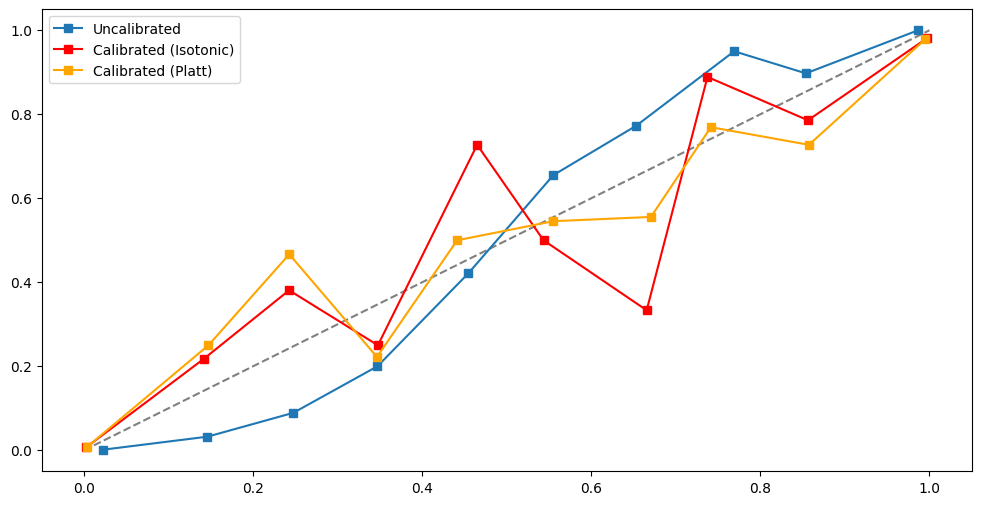

In [46]:
# oversampling - Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE

sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
)

X_sm, y_sm = sm_b1.fit_resample(X_train, y_train)
print(y_sm.value_counts())

clf = RandomForestClassifier()
compare_calibrated_curve(clf, X_sm, X_test, y_sm, y_test)

### Brier score

The Brier Score measures the fit of the probability estimates of the observed data or the accuracy of probabilistic estimates. It is given by the average squared difference of the true label and the predicted probability.

**Brier Score** = mean( $(y - y_pred_prob)^2$ )

- **Brier Score** is small when the proba estimates are close to th real class (phân phối xác suất của predict_proba tập trung tại 0 và 1, binary classification), and it increase as they diverge.
- **Brier Score** tend to work well with balanced data, not accurate when imbalanced dataset (because the effect of minority class obs does not affter the overall score
- For balance dataset, __Brier Score__ is bigger, suggesting that its probabilities are not as well calibrated

In [ ]:
from sklearn.metrics import brier_score_loss

brier_score_loss(y_test, y_test_pred_p)

## Lift and Gain

### Lift curve
$$\mathrm{Lift_m:}\;\;\left\{X-axis =\frac{TotalPositivePredicted}{m}=\frac{TP+FP}{m}, Y-axis =Lift =\frac{Recall}{\frac{TP+FP}{m}}\right\}$$

Với m là số outcome có highest probability (gần label 1 nhất), ví dụ m chạy từ subsample 1% --> 100% (step = 1%)

- Với mỗi subsample có highest Probability Positive, **Lift thể hiện subsample dự đoán đúng P gấp bao nhiêu lần so với totalsample**

- Lift curve đặc trưng bằng việc thay đổi tỷ lệ subsample của total data có mức độ highest probability positive để ứng với tỷ lệ đúng positive mong muốn gấp bao nhiêu lần so với total data, khác với ROC là thay đổi cutpoint cho xác suất để xác định P or N.

![image.png](_images/5_Evaluation_metrics/lift.png)

<AxesSubplot: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

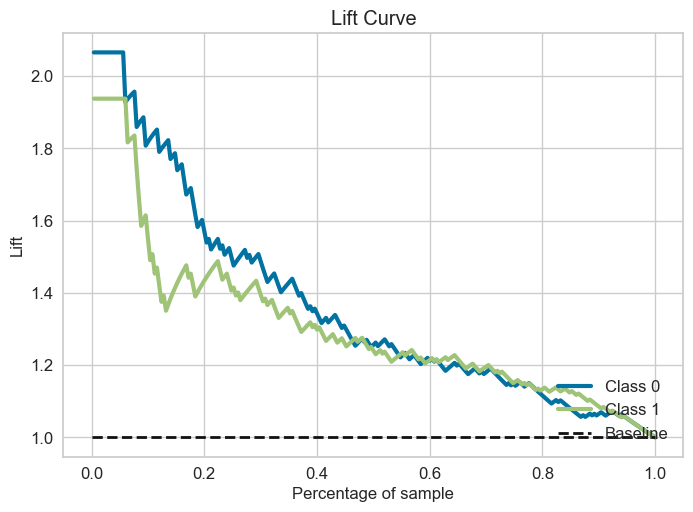

In [266]:
# multi-class
skplt.metrics.plot_lift_curve(y_test, lr.predict_proba(X_test))

### Gain curve

$$\mathrm{Gain_m:}\;\;\left\{X-axis =\frac{TotalPositivePredicted}{m}=\frac{TP+FP}{m}, Y-axis =Recall\right\}$$

Với m là số outcome có highest probability (gần label 1 nhất), ví dụ m chạy từ subsample 1% --> 100% (step = 1%)

- với mỗi subsample có highest Probability Positive, __Gain curve thể hiện subsample gain được bao nhiều % TP của total sample (khi proportion sample = 1 thì tương đương với việc sử dụng total sample)__

- Gain curve đặc trưng bằng việc thay đổi tỷ lệ subsample của total data có mức độ gain bao nhiêu %TP so với TP của total sample, khác với ROC là thay đổi cutpoint cho xác suất để xác định P or N.

<AxesSubplot: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

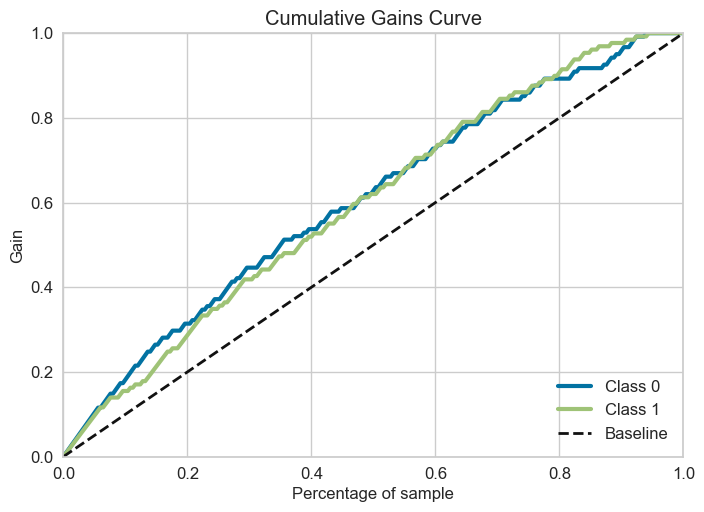

In [264]:
skplt.metrics.plot_cumulative_gain(y_test, lr.predict_proba(X_test))

Đường __bold-line__ tương ứng với random select subsample, còn đường gain-line tương ứng với việc có order và select theo highest probability outcome. Y-axis thể hiện gain được bao nhiêu % TP của total sample

## Loss function & others

### Index of Imbalanced Accuracy
Balance any scoring function using the IBA to wraps this function to dealing with imbalance data.
- if `Square` = `False`:
__IBA Function = Function * (1 + alpha * (Recall - Specificity) )__
- if `Square` = `True`:
__IBA Function = Function^2 * (1 + alpha * (Recall - Specificity) )__

In [281]:
from imblearn.metrics import make_index_balanced_accuracy as iba
from sklearn.metrics import accuracy_score

accuracy_score_iba = iba(alpha=0.1, squared=True)(accuracy_score)

print(accuracy_score(y_test, y_test_pred))
print(accuracy_score_iba(y_test, y_test_pred))

0.628
0.3956397425075277


In [284]:
((recall[1]-recall[0])/10+1)* accuracy_score(y_test, y_test_pred)**2

0.3956397425075277

### Log loss

In [285]:
from sklearn.metrics import log_loss

log_loss(y_test, y_test_pred_p)

0.617197431425657

### Zero-one loss

In [ ]:
# updating

### Hamming loss

In [ ]:
# updating

### Jaccard

In [ ]:
# updating

### Matthews correlation

In [ ]:
# updating

# Regression metrics

**Chú ý** : Bài toán **logistic** bản chất là 1 bài toán `regression` bới output của model là dự báo xác suất (giá trị `continuous`), kết hợp cùng với `cutpoint` để phân loại nhành kết quả nhị phân `Positive`/`Negetive`. Tuy nhiên `target` của bài toán là nhị phân 0/1 nên kết hợp điều chỉnh `cutpoint` và đánh giá kết hợp theo nhiều metrics.

In [288]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

## Variance metrics

### R square
- `R-square` / `adjusted R-square`: tỷ lệ variation được giải thích bởi model, from 0 to 1, dùng trong việc model giải thích tốt được bao nhiêu % trong hồi quy. Trong đó, `adjusted R-square` điều chỉnh lại R2 bằng số lượng biến trong model, vì càng nhiều biến multicorrlinearity dẫn tới overfitting, R2 càng cao, cần phải được điều chỉnh.
$$R^2 = 1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$

$$R_{adj}^2 = 1-(1-R^2)\frac{n-1}{n-p-1}$$

In [289]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.9486081370449679

### explained variance score
The Explained Variance score is similar to the R^2 score, with the notable difference that it does not account for systematic offsets in the prediction. Most often the R^2 score should be preferred.

In [287]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_true, y_pred)

0.9571734475374732

## Error metrics

Trong bài toán dự báo thì chúng ta muốn sai số giữa giá trị dự báo và giá trị thực tế là nhỏ nhất thường lựa chọn các metrics:

* MSE: Trung bình tổng bình phương sai số giữa giá trị dự báo và thực tế.
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2$$

* RMSE: Khai căn bậc hai của MSE và nó đại diện cho độ lệch giữa giá trị dự báo và thực tế.
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2)}$$

* MAE: Trung bình trị tuyệt đối của sai số giữa giá trị dự báo và thực tế.
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_i-\hat{y}_i|$$

* MAPE: Trung bình của tỷ lệ phần trăm sai số tuyệt đối giữa giá trị dự báo và thực tế.
$$\text{MAPE} = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_i-\hat{y}_i}{y_i}|$$

In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# MSE
print('MSE', mean_squared_error(y_true, y_pred, squared=True))

# RMSE
print('RMSE', mean_squared_error(y_true, y_pred, squared=False))

# MAE
print('MAE', mean_absolute_error(y_true, y_pred))

# MAPE
print('MAPE', mean_absolute_percentage_error(y_true, y_pred))

MSE 0.375
RMSE 0.6123724356957945
MAE 0.5
MAPE 0.3273809523809524


## Model selection

Model R2 and RMSE always become better when adding more variables, but that is not alway get better model. Need to use metric to assessing "add more variable effection" or use all variable possible is better ?

Method to find all model possible with large dataset is stepwise regression: start at full model and drop the variables that dont contribute meanningfully

- `adjusted R-square`
- $\mathrm{AIC}=2P+n\log(\mathrm{RSS}/n)$
    - `AICc` is suitable for small dataset
    - `BIC` is Stronger penalty 

# Clustering metrics

In [ ]:
# updating

# Pairwise metrics

In [ ]:
# updating